# About The Datasets
As far as the dataset is concerned, we have scraped it from Flipkart.comwebsite for laptops review and rating. The dataset consists of 2 columns and 22000 rows.

In [1]:
# Loading libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv(r'C:\Users\akifp\RatRew.csv')
df.head()

,Unnamed: 0,reviews_of_the_product,rating_of_the_product
0,0,Pros\n1. Good Speakers.\n2. Good Display.\n3. ...,4
1,1,looking very good and light wait super,4
2,2,I have been using this model for almost 2 week...,5
3,3,There is an annoying sound of touchpad low bui...,4
4,4,In this price range build quality could have b...,4


In [3]:
df.shape

(20000, 3)

In [4]:
# We will be removing the first column.

df.drop('Unnamed: 0',axis=1,inplace=True)

# Data Pre-Processing

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   reviews_of_the_product  20000 non-null  object
 1   rating_of_the_product   20000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 312.6+ KB


In [6]:
df.isnull().sum()

reviews_of_the_product    0
rating_of_the_product     0
dtype: int64

In [7]:
# Unique values present in Ratings: column
df['rating_of_the_product'].value_counts()

5    13200
4     6300
3      500
Name: rating_of_the_product, dtype: int64

In [8]:
df.describe()

,rating_of_the_product
count,20000.000000
mean,4.635000
std,0.530838
min,3.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


# Data Visualization

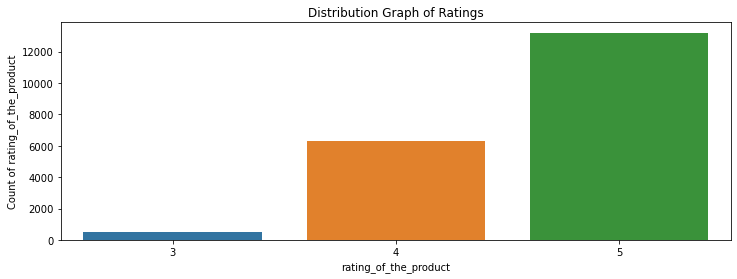

In [9]:
plt.figure(figsize=(12,4))    
sns.countplot(x='rating_of_the_product',data=df)
plt.title("Distribution Graph of Ratings")
plt.xlabel('rating_of_the_product')
plt.ylabel("Count of rating_of_the_product")
plt.show()

# Observation
People gave a rating of 5 in most of the reviews followed by 3 and 4.

# Applying NLP for Sentiment Analysis¶

In [10]:
# Loading essential libraries
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [11]:
from wordcloud import WordCloud

In [12]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\akifp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
def clean_text(df, df_column_name):
    
    #converting all message to lower text
    df[df_column_name] = df[df_column_name].str.lower()
    
    #Replace email address with email 
    df[df_column_name] = df[df_column_name].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','e-mail')
    
    #Replace URL's with web address
    df[df_column_name] = df[df_column_name].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','web-address')
    
    #Replace money symbols with 'dollars' (£ can by typed with ALT key + 156)
    df[df_column_name] = df[df_column_name].str.replace(r'£|\$', 'dollars')
    
    # Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phoneno.'
    df[df_column_name] = df[df_column_name].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phoneno.')
    
    # Replace numbers with 'numbr'
    df[df_column_name] = df[df_column_name].str.replace(r'\d+(\.\d+)?', 'numbr')
    
    # Remove punctuation
    df[df_column_name] = df[df_column_name].str.replace(r'[^\w\d\s]', ' ')
    
    # Replace whitespace between terms with a single space
    df[df_column_name] = df[df_column_name].str.replace(r'\s+', ' ')
    
    # Remove leading and trailing whitespace
    df[df_column_name] = df[df_column_name].str.replace(r'^\s+|\s+?$', '')
    
    # Remove stopwords
    
    stop_words = set(stopwords.words('english') + ['u', 'ü', 'â', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
    df[df_column_name] = df[df_column_name].apply(lambda x:' '.join(term for term in x.split() if term not in stop_words))

In [14]:
clean_text(df, 'reviews_of_the_product')
df['reviews_of_the_product'].head(3)

0    pros numbr good speakers numbr good display nu...
1                        looking good light wait super
2    using model almost numbr weeks think gaming ru...
Name: reviews_of_the_product, dtype: object

In [15]:
# Using RegexpTokenizer for tokenizing the data
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
df['reviews_of_the_product'] = df['reviews_of_the_product'].apply(lambda x: tokenizer.tokenize(x.lower()))
df.head()

,reviews_of_the_product,rating_of_the_product
0,"[pros, numbr, good, speakers, numbr, good, dis...",4
1,"[looking, good, light, wait, super]",4
2,"[using, model, almost, numbr, weeks, think, ga...",5
3,"[annoying, sound, touchpad, low, buildquality]",4
4,"[price, range, build, quality, could, much, be...",4


In [16]:
# First Lemmatizing and then Stemming(Snowball Method) for reducing characters
stemmer = SnowballStemmer("english")
import gensim
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text,pos='v'))

#Tokenize
def preprocess(text):
    result = []
    for token in text:
        if len(token)>=3:
            result.append(lemmatize_stemming(token))
            
        return result

In [17]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\akifp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [18]:
# Processing review with above Function
processed_review = []

for doc in df['reviews_of_the_product']:
    processed_review.append(preprocess(doc))
    
print(len(processed_review))
processed_review[:3]

20000


[['pros'], ['look'], ['use']]

In [19]:
df['cleansed review: ']=processed_review  #Assigning this to the dataframe
df.head()

,reviews_of_the_product,rating_of_the_product,cleansed review:
0,"[pros, numbr, good, speakers, numbr, good, dis...",4,[pros]
1,"[looking, good, light, wait, super]",4,[look]
2,"[using, model, almost, numbr, weeks, think, ga...",5,[use]
3,"[annoying, sound, touchpad, low, buildquality]",4,[annoy]
4,"[price, range, build, quality, could, much, be...",4,[price]


In [20]:
df['reviews_of_the_product'] = df['cleansed review: '].apply(lambda x:' '.join(y for y in x))
df.head()

,reviews_of_the_product,rating_of_the_product,cleansed review:
0,pros,4,[pros]
1,look,4,[look]
2,use,5,[use]
3,annoy,4,[annoy]
4,price,4,[price]


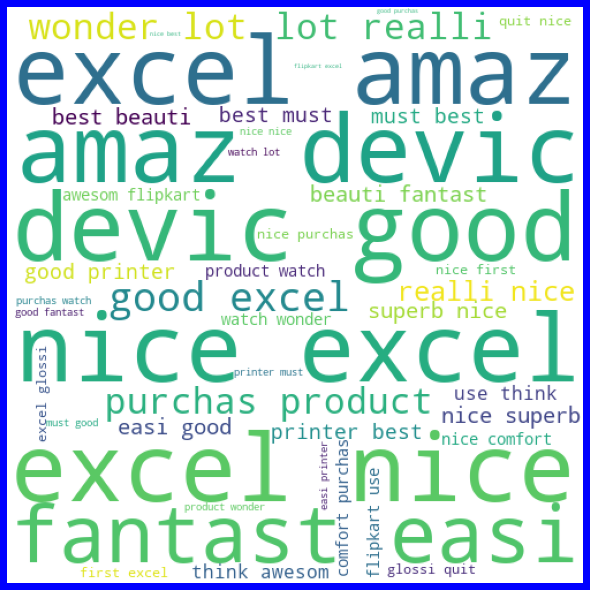

In [21]:
# Getting sense of words in Rating 5
one = df['reviews_of_the_product'][df['rating_of_the_product']==5.0]

one_cloud = WordCloud(width=500,height=500,background_color='white',max_words=300).generate(' '.join(one))

plt.figure(figsize=(10,8),facecolor='b')
plt.imshow(one_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

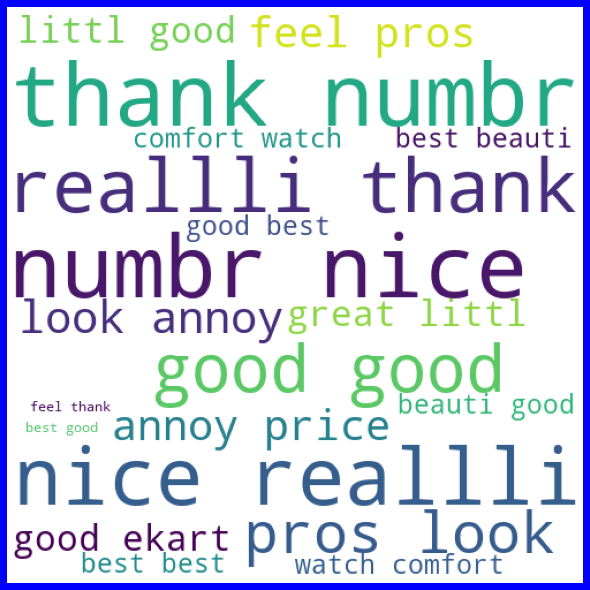

In [22]:
# Getting sense of words in Rating 4
one = df['reviews_of_the_product'][df['rating_of_the_product']==4.0]

one_cloud = WordCloud(width=500,height=500,background_color='white',max_words=300).generate(' '.join(one))

plt.figure(figsize=(10,8),facecolor='b')
plt.imshow(one_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


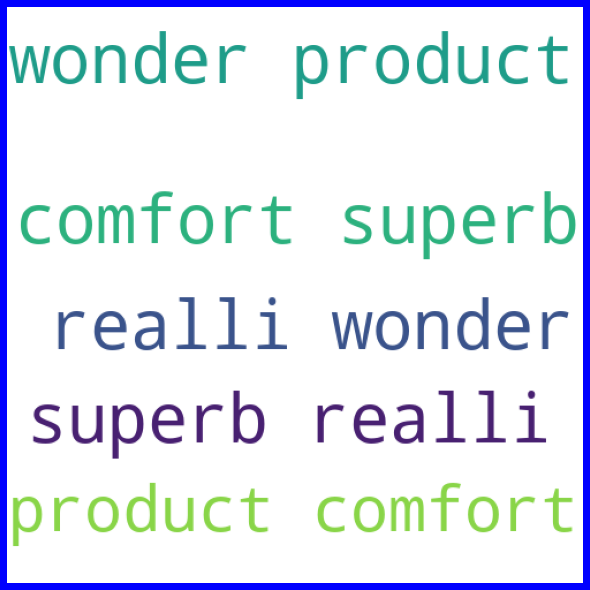

In [23]:
# Getting sense of words in Rating 3
one = df['reviews_of_the_product'][df['rating_of_the_product']==3.0]

one_cloud = WordCloud(width=500,height=500,background_color='white',max_words=300).generate(' '.join(one))

plt.figure(figsize=(10,8),facecolor='b')
plt.imshow(one_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# Feature Extraction

In [24]:
tf = TfidfVectorizer()
ft = tf.fit_transform(df["reviews_of_the_product"])
x=ft
y=df["rating_of_the_product"]

In [25]:
x.shape

(20000, 38)

In [26]:
y.shape

(20000,)

# Model Building and Training

In [27]:
# Importing Essential Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [28]:
# Finding the best random state

max_a_score=0
for r_state in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
    regr=LogisticRegression()
    regr.fit(x_train,y_train)
    y_pred=regr.predict(x_test)
    accu=accuracy_score(y_test,y_pred)
    if accu>max_a_score:
        max_a_score=accu
        final_r_state=r_state
print("Max accuracy score corresponding to",final_r_state,"is",max_a_score)

Max accuracy score corresponding to 45 is 0.9025


We got accuracy score of 90 on r_state 45.

In [29]:
# Coverting to train and test data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=47)

In [30]:
model = [LogisticRegression(),MultinomialNB(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier()]
for m in model:
    m.fit(x_train,y_train)
    print('Score of',m,'is:',m.score(x_train,y_train))
    predm=m.predict(x_test)
    print('Scores:')
    print('Accuracy Score:',accuracy_score(y_test,predm))
    print('Cross Val Score:',cross_val_score(m,x,y,cv=5,scoring='accuracy').mean())
    print('Classification Report:',classification_report(y_test,predm))
    print("Confusion Matrix:",confusion_matrix(y_test,predm))
    print('*************************************************************')
    print('\n')

Score of LogisticRegression() is: 0.8896875
Scores:
Accuracy Score: 0.89125
Cross Val Score: 0.78965
Classification Report:               precision    recall  f1-score   support

           3       0.00      0.00      0.00       109
           4       1.00      0.73      0.84      1211
           5       0.86      1.00      0.92      2680

    accuracy                           0.89      4000
   macro avg       0.62      0.58      0.59      4000
weighted avg       0.88      0.89      0.88      4000

Confusion Matrix: [[   0    0  109]
 [   0  885  326]
 [   0    0 2680]]
*************************************************************


Score of MultinomialNB() is: 0.8641875
Scores:
Accuracy Score: 0.86825
Cross Val Score: 0.7396499999999999
Classification Report:               precision    recall  f1-score   support

           3       0.00      0.00      0.00       109
           4       1.00      0.65      0.79      1211
           5       0.84      1.00      0.91      2680

    accura

# Observation:
We are getting best scores and cross-validation scores using Logistic regression and Random Forest Classifier but we will be using RFC for building our model because of its better scores.

Now, we will improve their accuracy using Hyper-parameter tuning.¶

In [31]:
# Hyper-Paramter Tuning(using GridCVSearch)
parameters={'n_estimators':[1,10,100]}

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
gb=GradientBoostingClassifier(random_state=47)   
gb=GridSearchCV(gb,parameters,cv=3,scoring='accuracy')
gb.fit(x_train,y_train)
print(gb.best_params_)    
print(gb.best_score_)

{'n_estimators': 100}
0.8641875653411315


In [32]:
gb=GradientBoostingClassifier(random_state=45,n_estimators=100)
gb.fit(x_train,y_train)
pred=gb.predict(x_test)
print("Accuracy score: ",accuracy_score(y_test,pred)*100)
print('Cross validation score: ',cross_val_score(gb,x,y,cv=3,scoring='accuracy').mean()*100)
print('Classification report: \n')
print(classification_report(y_test,pred))
print('Confusion matrix: \n')
print(confusion_matrix(y_test,pred))

Accuracy score:  86.825
Cross validation score:  65.26518708568022
Classification report: 

              precision    recall  f1-score   support

           3       0.00      0.00      0.00       109
           4       1.00      0.65      0.79      1211
           5       0.84      1.00      0.91      2680

    accuracy                           0.87      4000
   macro avg       0.61      0.55      0.57      4000
weighted avg       0.86      0.87      0.85      4000

Confusion matrix: 

[[   0    0  109]
 [   0  793  418]
 [   0    0 2680]]


# Saving the Model(Gradient boosting algorithm)

In [33]:
# Saving the best Ridge model
import joblib
joblib.dump(gb,'Rating_Pred.pkl')

['Rating_Pred.pkl']